# Plot the data of "ion1testold"

 Import Packets and Set Gengeric Information, parameters

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import MultipleLocator
import os
plt.rcParams['ytick.right']  =plt.rcParams['xtick.top'] =True
xminorLocator=MultipleLocator(2)
#plt.rcParams['set_minor_locator']=xminorLocator
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["TimeNewroman"]})
# for Palatino and other serif fonts use:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})
# It's also possible to use the reduced notation by directly setting font.family:
plt.rcParams.update({
  "text.usetex": True,
  "font.family": "TimeNewroman",
  "font.size": 12,
})
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
#from mpl_toolkits.mplot3d import Axes3D
#dir="D:\\doc\\data\\ion1testold\\DifferentDelatTimeOfPumpAndProbe\\dteq50fs\\"
#dir="D:\\doc\\data\\ion1testold\\t500t840\\44\\"
dir='D:\\doc\\data\\ion1testold\\NoAlignment\\41\\'
#dir='D:\\dataofpro\\'
print('Working directory',dir)
print("\n")
f=open(dir+"alog.dat",encoding="utf-8")
print(f.read(1500))


levels=100
figureDPI=1200
figureType="jpeg"

timeUnit="fs"

Working directory D:\doc\data\ion1testold\NoAlignment\41\


 The calculation starts at   0.0000000000000000      femtoseconds and ends at   1501.0000000000000      femtoseconds
 |----- Quantization parameter -----|
         nr=       128       nj=        60     trux=        15       nn=       900       dt=   0.50000   fs
      ntmax=      3002     xmin=   1.75000     xmax=  20.00000       dx=   0.14258
 |-----  Molecular parameters  -----|
   LiH: Reduced mass=   1604.3258056640625      a.u.Rotation coefficient=   7.5100002288818359      1/cm
 nr         128 nj          60 trux          15 nn         900
 dt=  0.50000000000000000      fs
 rota =   7.5100002288818359      1/cm
 Calculated time boundary at   0.0000000000000000      fs
 Absorbing boundary   1.0000000000000000      :   19.500000000000000     
 Set pulses data by set_pulse.in
 |----- Laser pulse parameters -----|
 |----- Laser pulse parameters -----|
       E-feild(V/m)       Freqceny(cm)    Center_time(ps)           FWHM(p

Get the time points from the data

In [2]:
if os.path.exists(dir+'laser.dat'):
    TimeBegin =(min(np.loadtxt(dir+'Laser.dat')[:,0]))
    TimeEnd   =(max(np.loadtxt(dir+'Laser.dat')[:,0]))
    dt=np.loadtxt(dir+'Laser.dat')[1,0]-np.loadtxt(dir+'Laser.dat')[0,0]
elif os.path.exists(dir+'laserField.dat'):
    TimeBegin =(min(np.loadtxt(dir+'Laserfield.dat')[:,0]))
    TimeEnd   =(max(np.loadtxt(dir+'Laserfield.dat')[:,0]))
    dt=np.loadtxt(dir+'LaserField.dat')[1,0]-np.loadtxt(dir+'LaserField.dat')[0,0]
else:
    print('Cant find the data file')
TimeTurn  =(min(np.loadtxt(dir+'ori_ali_1.dat')[:,0])) 
if TimeEnd<5:
    print('The unit of time is ps!')
    timeUnit="ps"
print('dt= ',dt)
turnPoint =int((TimeTurn-TimeBegin)/dt)
print('tunepoint=',turnPoint)
print(' Begin time:',TimeBegin,timeUnit+'\n End time  :',TimeEnd,timeUnit+' \n Turn time :',TimeTurn,timeUnit)

dt=  0.5
tunepoint= 1
 Begin time: 0.0 fs
 End time  : 1500.5 fs 
 Turn time : 0.5 fs


Plot absorption of the dimsension of the internuclear distance

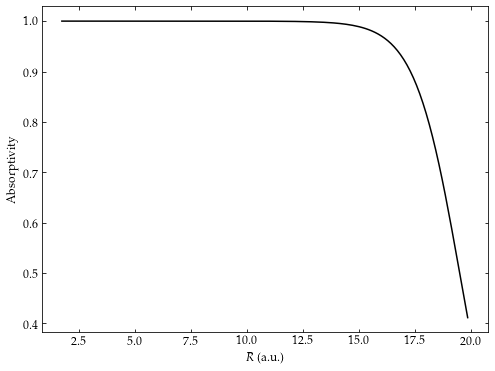

In [3]:
if os.path.exists(dir+'absb.dat'):
    data=np.loadtxt(dir+'Absb.dat') #get data form dir+'absb.dat'
else:
    data=np.loadtxt(dir+'Absorption.dat')
x=data[:,0]
y1=data[:,1]
plt.xlabel("$\t{R}$ (a.u.) ")
plt.ylabel("Absorptivity")
#x=x
#y=y1
#plt.text(min(x)+(max(x)-min(x))*0.95,min(y)+(max(y)-min(y))*0.95,"(a)")
plt.plot(x,y1,'k-')
#plt.savefig(dir+"Absorption."+figureType,bbox_inches="tight",transparent=True,dpi=figureDPI)
plt.show()

Plot potential energy of electric states

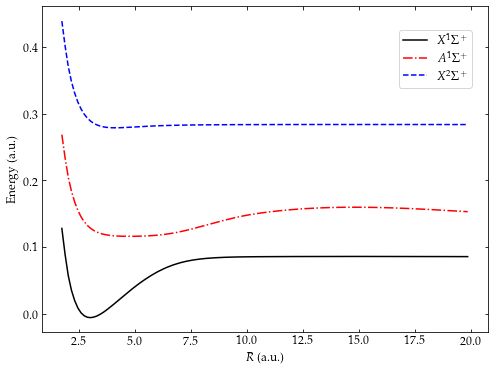

In [4]:
if os.path.exists(dir+'pott.dat'):
    data=np.loadtxt(dir+"Pott.dat")
else:
    data=np.loadtxt(dir+"PotentialEnergy.dat")

x=data[:,0]
y1=data[:,1]
y2=data[:,2]
y3=data[:,3]
plt.xlabel("$\t{R}$ (a.u.) ")
plt.ylabel("Energy (a.u.)")
plt.plot(x,y1,'k-',x,y2,'r-.',x,y3,'b--')
plt.legend(['$X^1\Sigma^+$','$A^1 \Sigma ^+$','$X^2 \Sigma ^+$'],loc=(0.8,0.75))
#plt.savefig(dir+"pott."+figureType,bbox_inches="tight",transparent=True,dpi=figureDPI)

Plot Initial wave function 

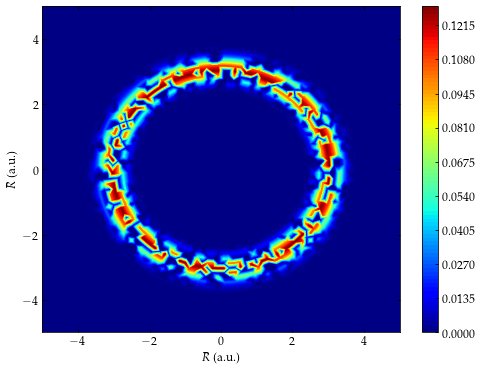

In [5]:
import scipy.ndimage
plt.figure(figsize=(8,6))
if os.path.exists(dir+"wave2d.dat"):
    DataAng =np.loadtxt(dir+"wave2d.dat")
else:   
    DataAng =np.loadtxt(dir+"InitialWavePacket.dat")
#DataAng=scipy.ndimage.zoom(DataAng,1)
#plt.style.use('_mpl-gallery-nogrid')
x=DataAng[:,0]
y=DataAng[:,1]
z=DataAng[:,2]
plt.xlim(-5, 5)
plt.ylim(-5, 5)
ax=plt.tricontourf(x,y,z,levels,cmap='jet')

#interpolation='spline16'
plt.colorbar()
plt.xlabel("$\tR$ (a.u.)")
plt.ylabel("$\tR$ (a.u.)")
#plt.savefig(dir+"InitialWavePacket."+figureType,bbox_inches = 'tight',transparent=True,dpi=figureDPI)
plt.show()

Plot the electronic field of the lasers

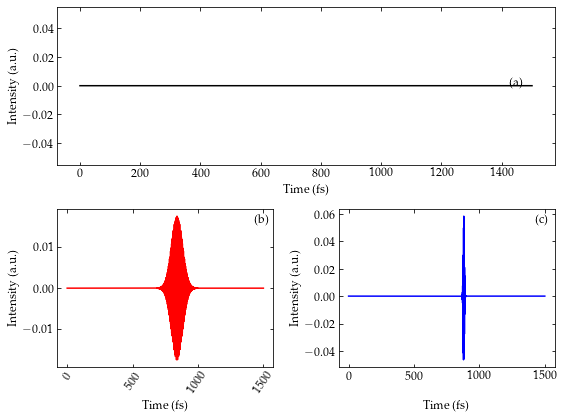

In [6]:
if os.path.exists(dir+"Laser.dat"):
    data=np.loadtxt(dir+"Laser.dat")
else:
    data=np.loadtxt(dir+"LaserField.dat")

x =data[:,0]
y1=data[:,1]
x2=data[turnPoint:,0]
y2=data[turnPoint:,2]
y3=data[turnPoint:,3]
import matplotlib.gridspec as gridspec
fig = plt.figure(tight_layout=True)
gs = gridspec.GridSpec(2, 2)
ax = fig.add_subplot(gs[0,:])
ax.plot(x,y1,'k-')#
#ax.set_xlim([-10,100])
x=x
y=y1
plt.text(min(x)+(max(x)-min(x))*0.95,min(y)+(max(y)-min(y))*0.95,"(a)")
ax.set_ylabel('Intensity (a.u.)')
ax.set_xlabel('Time (fs)')
for i in range(2):
    ax = fig.add_subplot(gs[1, i])
    if i==0:
        ax.plot(x2,y2,'r-')
        x=x2
        y=y2
        plt.text(min(x)+(max(x)-min(x))*0.95,min(y)+(max(y)-min(y))*0.95,"(b)")
    if i==1:
        ax.plot(x2,y3,'b-')
        x=x2
        y=y3
        plt.text(min(x)+(max(x)-min(x))*0.95,min(y)+(max(y)-min(y))*0.95,"(c)")
    ax.set_ylabel('Intensity (a.u.)')
    ax.set_xlabel('Time (fs)')
    if i == 0:
        for tick in ax.get_xticklabels():
            tick.set_rotation(55)
fig.align_labels()  # same as fig.align_xlabels(); fig.align_ylabels()
plt.show()

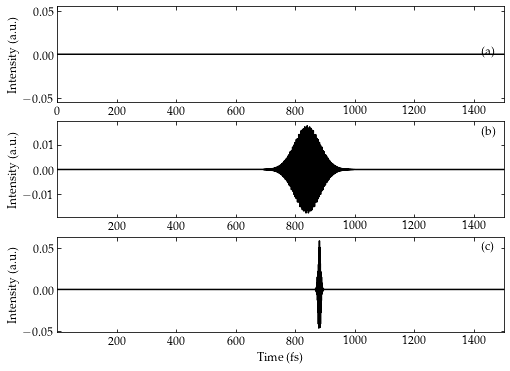

In [7]:
if os.path.exists(dir+"Laser.dat"):
    data=np.loadtxt(dir+"Laser.dat")
else:
    data=np.loadtxt(dir+"LaserField.dat")

x=data[:,0]
y1=data[:,1]
y2=data[:,2]
y3=data[:,3]

plt.subplot(3,1,1)
#plt.grid(False)
x=x
y=y1
plt.text(min(x)+(max(x)-min(x))*0.95,min(y)+(max(y)-min(y))*0.9,"(a)")
plt.xlabel('Time ('+timeUnit+')')
plt.ylabel("Intensity (a.u.)")
plt.xlim(TimeBegin,TimeEnd)
plt.plot(x,y1,'k-')

plt.subplot(3,1,2)
#plt.grid(False)
#plt.title("(b)",loc="left")
plt.xlabel('Time ('+timeUnit+')')
plt.ylabel("Intensity (a.u.)")
plt.xlim(TimeTurn,TimeEnd)
plt.plot(x,y2,'k-')
x=x
y=y2
plt.text(TimeTurn+(TimeEnd-TimeTurn)*0.95,min(y)+(max(y)-min(y))*0.9,"(b)")

plt.subplot(3,1,3)
#plt.grid(False)
x=x
y=y3
plt.text(TimeTurn+(TimeEnd-TimeTurn)*0.95,min(y)+(max(y)-min(y))*0.9,"(c)")

plt.xlabel('Time ('+timeUnit+')')
plt.ylabel("Intensity (a.u.)")
plt.xlim(TimeTurn,TimeEnd)
plt.plot(x,y3,'k-')

Plot the Potential energy and dipole moment

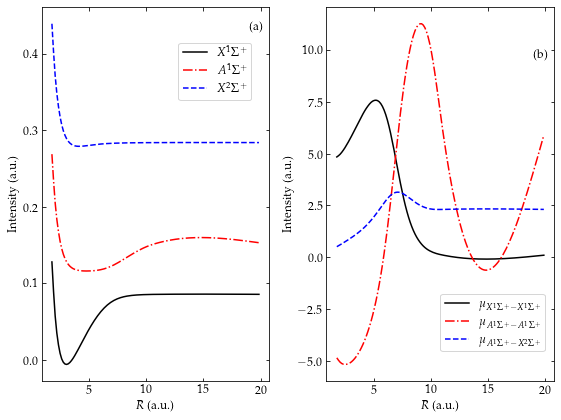

In [8]:
plt.subplot(1,2,1)
if os.path.exists(dir+"pott.dat"):
    data=np.loadtxt(dir+"Pott.dat")
else:
    data=np.loadtxt(dir+"PotentialEnergy.dat")

x=data[:,0]
y1=data[:,1]
y2=data[:,2]
y3=data[:,3]
#plt.grid(False)
x=x
y=y3
plt.text(min(x)+(max(x)-min(x))*0.95,min(y)+(max(y)-min(y))*0.95,"(a)")
plt.xlabel('$\\textit{R}$ (a.u.)')
plt.ylabel("Intensity (a.u.)")
plt.plot(x,y1,'k-',x,y2,'r-.',x,y3,'b--')
plt.legend(['$X^1\Sigma^+$','$A^1 \Sigma ^+$','$X^2 \Sigma ^+$'],loc=(0.6,0.75))
plt.subplot(1,2,2)
if os.path.exists(dir+"Dipole.dat"):
    data=np.loadtxt(dir+"Dipole.dat")
else:
    data=np.loadtxt(dir+"DipoleMoment.dat")

x=data[:,0]
y=data[:,2]
plt.text(min(x)+(max(x)-min(x))*0.95,min(y)+(max(y)-min(y))*0.9,"(b)")
plt.xlabel("$\\textit{R}$  (a.u.)")
plt.ylabel("Intensity (a.u.)")
plt.plot(data[:,0],data[:,1],'k-',data[:,0],data[:,2],'r-.',data[:,0],data[:,3],'b--')
plt.legend(["$\mu_{X^1\Sigma^+ - X^1\Sigma^+} $","$\mu_{A^1\Sigma^+ - A^1\Sigma^+} $","$\mu_{A^1\Sigma^+ - X^2\Sigma^+} $"],loc=(0.5,0.08))
plt.tight_layout()
#plt.savefig(dir+"PotentialEnergyAndDipoleMent."+figureType,bbox_inches = 'tight',dpi=figureDPI)
plt.show()


Plot orientation and alignment of the groud state

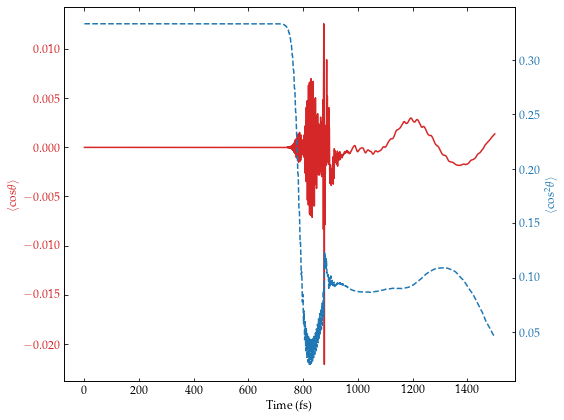

In [9]:
if os.path.exists(dir+"cos1.dat"):
    data=np.loadtxt(dir+"cos1.dat")
else:
    data=np.loadtxt(dir+"orientationAndAlignment.dat")

x=data[:,0]
y1=data[:,1]
y2=data[:,2]
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Time ('+timeUnit+')')
ax1.set_ylabel('$\\langle{\\rm  cos} \\theta \\rangle$', color=color)
ax1.plot(x, y1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('$\\langle{\\rm cos^2} \\theta \\rangle$', color=color)  # we already handled the x-label with ax1
ax2.plot(x, y2,'--', color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig(dir+"OrientationAndAlignment."+figureType,bbox_inches = 'tight',dpi=figureDPI)
plt.show()

Plot evolution of angle-resolved wave packets

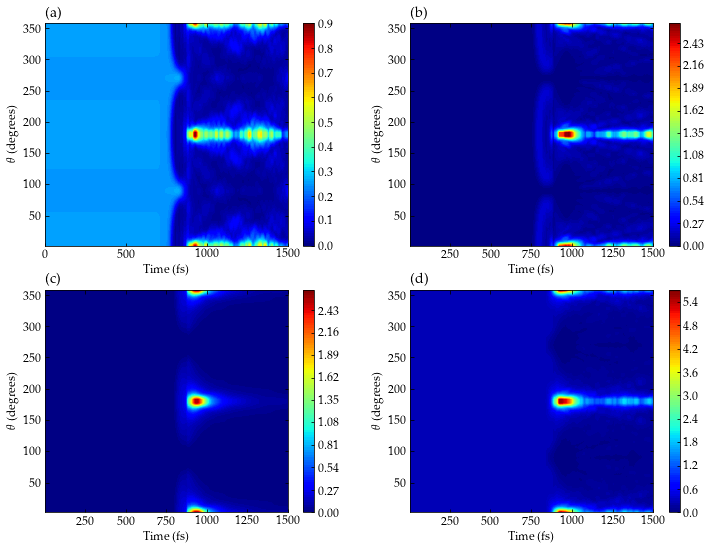

In [10]:
plt.figure(figsize=(12,9))
if os.path.exists(dir+"vgr_ang.dat"):
    plt.subplot(2,2,1)
    DataAng =np.loadtxt(dir+"vgr_ang.dat")
    #plt.style.use('_mpl-gallery-nogrid')
    x=DataAng[:,0]
    y=DataAng[:,1]
    z=DataAng[:,2]
    plt.title("(a)",loc='left')
    plt.xlim(TimeBegin, TimeEnd )
    plt.tricontourf(x,y,z,levels,cmap='jet')
    plt.colorbar()
    plt.xlabel("Time ("+timeUnit+")")
    plt.ylabel("$\\theta$ (degrees)")
    plt.subplot(2,2,2)
    DataAng =np.loadtxt(dir+"Exc_ang.dat")
    #plt.style.use('_mpl-gallery-nogrid')
    x=DataAng[:,0]
    y=DataAng[:,1]
    z=DataAng[:,2]
    plt.title("(b)",loc='left')
    plt.xlim(TimeTurn,TimeEnd)
    plt.tricontourf(x,y,z,levels,cmap='jet')
    plt.colorbar()
    plt.xlabel("Time ("+timeUnit+")")
    plt.ylabel("$\\theta$ (degrees)")
    plt.subplot(2,2,3)
    DataAng =np.loadtxt(dir+"Ion_ang.dat")
    #plt.style.use('_mpl-gallery-nogrid')
    x=DataAng[:,0]
    y=DataAng[:,1]
    z=DataAng[:,2]
    plt.xlim(TimeTurn,TimeEnd)
    plt.title("(c)",loc='left')
    plt.tricontourf(x,y,z,levels,cmap='jet')
    plt.colorbar()
    plt.xlabel("Time ("+timeUnit+")")
    plt.ylabel("$\\theta$ (degrees)")
    plt.subplot(2,2,4)
    DataAng =np.loadtxt(dir+"TotalAngDis.dat")
    #plt.style.use('_mpl-gallery-nogrid')
    x=DataAng[:,0]
    y=DataAng[:,1]
    z=DataAng[:,2]
    plt.title("(d)",loc='left')
    plt.tricontourf(x,y,z,levels,cmap='jet')
    plt.colorbar()
    plt.xlabel("Time ("+timeUnit+")")
    plt.ylabel("$\\theta$ (degrees)")
elif so.path.exists(dir+"GroAngWave.dat"):
    plt.subplot(2,2,1)
    DataAng =np.loadtxt(dir+"GroAngWave.dat")
    #plt.style.use('_mpl-gallery-nogrid')
    x=DataAng[:,0]
    y=DataAng[:,1]
    z=DataAng[:,2]
    plt.title("(a)",loc='left')
    plt.xlim(TimeBegin, TimeEnd )
    plt.tricontourf(x,y,z,levels,cmap='jet')
    plt.colorbar()
    plt.xlabel("Time ("+timeUnit+")")
    plt.ylabel("$\\theta$ (degrees)")
    plt.subplot(2,2,2)
    DataAng =np.loadtxt(dir+"ExcAngWave.dat")
    #plt.style.use('_mpl-gallery-nogrid')
    x=DataAng[:,0]
    y=DataAng[:,1]
    z=DataAng[:,2]
    plt.title("(b)",loc='left')
    plt.xlim(TimeTurn,TimeEnd)
    plt.tricontourf(x,y,z,levels,cmap='jet')
    plt.colorbar()
    plt.xlabel("Time ("+timeUnit+")")
    plt.ylabel("$\\theta$ (degrees)")
    plt.subplot(2,2,3)
    DataAng =np.loadtxt(dir+"IonAngWave.dat")
    #plt.style.use('_mpl-gallery-nogrid')
    x=DataAng[:,0]
    y=DataAng[:,1]
    z=DataAng[:,2]
    plt.xlim(TimeTurn,TimeEnd)
    plt.title("(c)",loc='left')
    plt.tricontourf(x,y,z,levels,cmap='jet')
    plt.colorbar()
    plt.xlabel("Time ("+timeUnit+")")
    plt.ylabel("$\\theta$ (degrees)")
    plt.subplot(2,2,4)
    DataAng =np.loadtxt(dir+"TotalAngDis.dat")
    #plt.style.use('_mpl-gallery-nogrid')
    x=DataAng[:,0]
    y=DataAng[:,1]
    z=DataAng[:,2]
    plt.title("(d)",loc='left')
    plt.tricontourf(x,y,z,levels,cmap='jet')
    plt.colorbar()
    plt.xlabel("Time ("+timeUnit+")")
    plt.ylabel("$\\theta$ (degrees)")
else :
    print("No data available")
plt.savefig(dir+"WaveAngDis."+figureType,bbox_inches = 'tight',dpi=figureDPI)
plt.show()


Plot evolution of internuclear distance-resolved wave packages

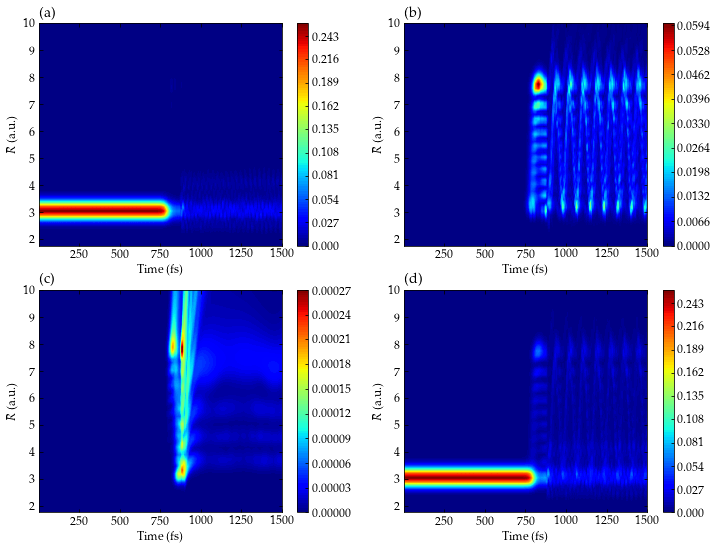

In [11]:
plt.figure(figsize=(12,9))
if os.path.exists(dir+"vgr_rad.dat"):     
    plt.subplot(2,2,1)
    DataAng =np.loadtxt(dir+"vgr_rad.dat")
    #plt.style.use('_mpl-gallery-nogrid')
    x=DataAng[:,0]
    y=DataAng[:,1]
    z=DataAng[:,2]
    plt.title("(a)",loc='left')
    plt.xlim(TimeTurn, TimeEnd )
    plt.ylim(1.75,10.0)
    plt.tricontourf(x,y,z,levels,cmap='jet')
    plt.colorbar()
    plt.xlabel("Time ("+timeUnit+")")
    plt.ylabel("$R$ (a.u.)")
    plt.subplot(2,2,2)
    DataAng =np.loadtxt(dir+"Exc_rad.dat")
    #plt.style.use('_mpl-gallery-nogrid')
    x=DataAng[:,0]
    y=DataAng[:,1]
    z=DataAng[:,2]
    plt.title("(b)",loc='left')
    plt.xlim(TimeTurn,TimeEnd)
    plt.ylim(1.75,10.0)
    plt.tricontourf(x,y,z,levels,cmap='jet')
    plt.colorbar()
    plt.xlabel("Time ("+timeUnit+")")
    plt.ylabel("$R$ (a.u.)")
    plt.subplot(2,2,3)
    DataAng =np.loadtxt(dir+"Ion_rad.dat")
    #plt.style.use('_mpl-gallery-nogrid')
    x=DataAng[:,0]
    y=DataAng[:,1]
    z=DataAng[:,2]
    plt.xlim(TimeTurn,TimeEnd)
    plt.ylim(1.75,10.0)
    plt.title("(c)",loc='left')
    plt.tricontourf(x,y,z,levels,cmap='jet')
    plt.colorbar()
    plt.xlabel("Time ("+timeUnit+")")
    plt.ylabel("$R$ (a.u.)")
    plt.subplot(2,2,4)
    DataAng =np.loadtxt(dir+"TotalRadDis.dat")
    #plt.style.use('_mpl-gallery-nogrid')
    x=DataAng[:,0]
    y=DataAng[:,1]
    z=DataAng[:,2]
    plt.xlim(TimeTurn,TimeEnd)
    plt.ylim(1.75,10.0)
    plt.title("(d)",loc='left')
    plt.tricontourf(x,y,z,levels,cmap='jet')
    plt.colorbar()
    plt.xlabel("Time ("+timeUnit+")")
    plt.ylabel("$R$ (a.u.)")
elif os.path.exists(dir+"GroRadWave.dat"):
    plt.subplot(2,2,1)
    DataAng =np.loadtxt(dir+"GroRadWave.dat")
    #plt.style.use('_mpl-gallery-nogrid')
    x=DataAng[:,0]
    y=DataAng[:,1]
    z=DataAng[:,2]
    plt.title("(a)",loc='left')
    plt.xlim(TimeTurn, TimeEnd )
    plt.ylim(1.75,10.0)
    plt.tricontourf(x,y,z,levels,cmap='jet')
    plt.colorbar()
    plt.xlabel("Time ("+timeUnit+")")
    plt.ylabel("$R$ (a.u.)")
    plt.subplot(2,2,2)
    DataAng =np.loadtxt(dir+"ExcRadWave.dat")
    #plt.style.use('_mpl-gallery-nogrid')
    x=DataAng[:,0]
    y=DataAng[:,1]
    z=DataAng[:,2]
    plt.title("(b)",loc='left')
    plt.xlim(TimeTurn,TimeEnd)
    plt.ylim(1.75,10.0)
    plt.tricontourf(x,y,z,levels,cmap='jet')
    plt.colorbar()
    plt.xlabel("Time ("+timeUnit+")")
    plt.ylabel("$R$ (a.u.)")
    plt.subplot(2,2,3)
    DataAng =np.loadtxt(dir+"IonRadWave.dat")
    #plt.style.use('_mpl-gallery-nogrid')
    x=DataAng[:,0]
    y=DataAng[:,1]
    z=DataAng[:,2]
    plt.xlim(TimeTurn,TimeEnd)
    plt.ylim(1.75,10.0)
    plt.title("(c)",loc='left')
    plt.tricontourf(x,y,z,levels,cmap='jet')
    plt.colorbar()
    plt.xlabel("Time ("+timeUnit+")")
    plt.ylabel("$R$ (a.u.)")
    plt.subplot(2,2,4)
    DataAng =np.loadtxt(dir+"TotalRadDis.dat")
    #plt.style.use('_mpl-gallery-nogrid')
    x=DataAng[:,0]
    y=DataAng[:,1]
    z=DataAng[:,2]
    plt.xlim(TimeTurn,TimeEnd)
    plt.ylim(1.75,10.0)
    plt.title("(d)",loc='left')
    plt.tricontourf(x,y,z,levels,cmap='jet')
    plt.colorbar()
    plt.xlabel("Time ("+timeUnit+")")
    plt.ylabel("$R$ (a.u.)")
else:
    print("No rad-resovled wave data available")
plt.savefig(dir+"WaveRadDis."+figureType,bbox_inches = 'tight',dpi=figureDPI)
plt.show()


Plot population of electronic states

In [12]:
if os.path.exists(dir+"popu.dat"):
    data=np.loadtxt(dir+"Popu.dat")
elif os.path.exists(dir+"PopulationOfState.dat"):
    data = np.loadtxt(dir+"PopulationOfState.dat")
else:
    print("No PopulationOfState dataset found.")
plt.xlim(TimeTurn,TimeEnd)
ax=plt.plot(data[:,0],data[:,1],'k-',data[:,0],data[:,2],'r-',data[:,0],1-data[:,1]-data[:,2],'b-')
plt.legend(["Gro","Exc","Ion"],loc=(0.83,0.79))
plt.xlabel("Time ("+timeUnit+")")
plt.ylabel("Population")
plt.savefig(dir+"PopulationOfState."+figureType,dpi=figureDPI,bbox_inches="tight")

Plot population of vibrational states

In [ ]:
plt.figure(figsize=(12,9))
plt.subplot(2,1,1)
DataPop =np.loadtxt(dir+"p_vgr_v.dat")
#plt.style.use('_mpl-gallery-nogrid')
x=DataPop[:,0]
y=DataPop[:,1]
z=DataPop[:,2]
plt.xlim(TimeBegin,TimeEnd)
plt.ylim(0,5)
plt.title("(a)",loc='left')
plt.tricontourf(x,y,z,cmap='jet')
plt.colorbar()
plt.xlabel("Time ("+timeUnit+")")
plt.ylabel("Vibrational quantum number v")

plt.subplot(2,1,2)
DataPop =np.loadtxt(dir+"p_exc_v.dat")
#plt.style.use('_mpl-gallery-nogrid')
x=DataPop[:,0]
y=DataPop[:,1]
z=DataPop[:,2]
plt.xlim(TimeTurn,TimeEnd)
plt.ylim(0,20)
plt.title("(b)",loc='left')
plt.tricontourf(x,y,z)
plt.colorbar()
plt.xlabel("Time ("+timeUnit+")")
plt.ylabel("Vibrational quantum number v")
plt.savefig(dir+"P_v."+figureType,bbox_inches = 'tight',dpi=figureDPI)
plt.show()

In [ ]:
plt.figure(figsize=(12,9))
plt.subplot(2,1,1)
DataPop =np.loadtxt(dir+"p_vgr_v.dat")
#plt.style.use('_mpl-gallery-nogrid')
x=DataPop[:,0]
y=DataPop[:,1]
z=DataPop[:,2]
ny=int((max(y)-min(y))/(y[2]-y[1]))+1
nx=int((max(x)-min(x))/(x[ny]-x[0]))+1
zMesh=np.zeros((ny,nx))
for i in range(1,nx):
    for j in range(1,ny):
        zMesh[j-1,i-1]=z[(i-1)*ny+j-1]
print('nx= ',nx,' ny= ',ny)
print('xMax= ',max(x),' xMin= ',min(x),' yMax= ',max(y),' yMin= ',min(y))
print('x[50]',x[50])
print(x[0])
print(zMesh)
xMesh=np.linspace(min(x),max(x),nx)
yMesh=np.linspace(min(y),max(y),ny)
#xx,yy,zz=np.meshgrid(xMesh,yMesh,zMesh)
plt.pcolormesh(xMesh,yMesh,zMesh,cmap='jet')
plt.ylim(-0.5,5.5)
plt.xlabel('Time ('+timeUnit+')')
plt.ylabel('Vibrational quantum state')
plt.colorbar()
plt.subplot(2,1,2)
DataPop =np.loadtxt(dir+"p_exc_v.dat")
#plt.style.use('_mpl-gallery-nogrid')
x=DataPop[:,0]
y=DataPop[:,1]
z=DataPop[:,2]
ny=int((max(y)-min(y))/(y[2]-y[1]))+1
nx=int((max(x)-min(x))/(x[ny]-x[0]))+1
zMesh=np.zeros((ny,nx))
for i in range(1,nx):
    for j in range(1,ny):
        zMesh[j-1,i-1]=z[(i-1)*ny+j-1]
print('nx= ',nx,' ny= ',ny)
print('xMax= ',max(x),' xMin= ',min(x),' yMax= ',max(y),' yMin= ',min(y))
print('x[50]',x[50])
print(x[0])
print(zMesh)
xMesh=np.linspace(min(x),max(x),nx)
yMesh=np.linspace(min(y),max(y),ny)
#xx,yy,zz=np.meshgrid(xMesh,yMesh,zMesh)
plt.pcolormesh(xMesh,yMesh,zMesh,cmap='jet')
plt.xlabel('Time ('+timeUnit+')')
plt.ylabel('Vibrational quantum state')
plt.ylim(-0.5,20.5)
plt.colorbar()

Plot orientation and alignment of the electronic states

In [ ]:
data=np.loadtxt(dir+"ori_ali_1.dat")
x=data[:,0]
y1=data[:,1]
y2=data[:,2]

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Time (fs)')
ax1.set_ylabel('$\\langle{\\rm cos} \\theta \\rangle$', color=color)
ax1.plot(x, y1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('$\\langle {\\rm cos^2} \\theta \\rangle$', color=color)  # we already handled the x-label with ax1
ax2.plot(x, y2,'--', color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig(dir+"GroundAlignmentAndOrientation."+figureType,bbox_inches = 'tight',dpi=figureDPI)
plt.show()

In [ ]:
data=np.loadtxt(dir+"ori_ali_2.dat")
x=data[:,0]
y1=data[:,1]
y2=data[:,2]

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Time (fs)')
ax1.set_ylabel('$\\langle{\\rm cos} \\theta \\rangle$', color=color)
ax1.plot(x, y1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('$\\langle {\\rm cos^2} \\theta \\rangle$', color=color)  # we already handled the x-label with ax1
ax2.plot(x, y2,'--', color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig(dir+"ExcitedAlignmentAndOrientation."+figureType,bbox_inches = 'tight',dpi=figureDPI)
plt.show()

In [ ]:
os.startfile(dir)

In [ ]:
r = np.arange(0, 2, 0.01)
theta = 2 * np.pi * r

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(theta, r)
ax.set_rmax(2)
ax.set_rticks([0.5, 1, 1.5, 2])  # Less radial ticks
ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(False)

ax.set_title("A line plot on a polar axis", va='bottom')
plt.show()